# Lung Nodule Detection in Chest X-RAY Images using Machine Learning and Deep learning approaches.


**Team Members:**
1.   Sri Lakshmi Prasanna Koneru 
2.   Saam Prasanth Deeven Pedapalli
3.   Indu Naik Guguloth

Mentor - Dr. Priyambada Subudhi


Project Code - B22PS01




---



Downloading the dependencies 

In [1]:
!pip install opendatasets

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


Importing Dependencies 

In [2]:
import os
import numpy as np
import pandas as pd 
from PIL import Image
from sklearn import svm
import cv2
from google.colab.patches import cv2_imshow
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from keras.models import Sequential
from keras.utils.np_utils import to_categorical
from sklearn.pipeline import make_pipeline
from sklearn.model_selection import GridSearchCV
from sklearn.neighbors import KNeighborsClassifier
from keras.layers import Flatten, Convolution2D, MaxPooling2D
from keras.layers import LSTM, Dense, Dropout, TimeDistributed
from keras.layers import LSTM, Dense, Dropout, Masking, Embedding
from sklearn.model_selection import train_test_split, GridSearchCV, StratifiedKFold
from keras.layers import Dense, Dropout, Activation, Flatten, Convolution2D, MaxPooling2D
from sklearn.metrics import classification_report, confusion_matrix, PrecisionRecallDisplay


Downloading the dataset from Kaggle 

In [3]:
import opendatasets as od

#Downloading the datset from kagle  
od.download("https://www.kaggle.com/datasets/raddar/nodules-in-chest-xrays-jsrt")

100%|██████████| 381M/381M [00:03<00:00, 128MB/s]


Generating the data 



In [4]:
#Generating the data for images
def dataGenerator():
  x = []
  y = []
  for file in os.listdir('/content/nodules-in-chest-xrays-jsrt/images/images'):
    img = Image.open("/content/nodules-in-chest-xrays-jsrt/images/images/{}".format(file))
    
    #Converting the images into RGB vlaues
    x = np.asarray(img.convert('RGB'))
    x = np.array([x])
    if file.startswith('JPCLN') : y = to_categorical([1]) 
    else: y = to_categorical([0])
    yield x, y 

X.npy contains the image pixel values and Y.npy contains Binary classification.

In [ ]:
X = []
Y = []

for file in os.listdir('/content/nodules-in-chest-xrays-jsrt/images/images'):
  img = Image.open("/content/nodules-in-chest-xrays-jsrt/images/images/{}".format(file))
  X.append(np.asarray(img.convert('RGB')))
  if file.startswith('JPCLN') : Y.append(1)
  else: Y.append(0)

print(len(X),X[0].shape)

Saving the files as X.npy and Y.npy

In [ ]:
#Saving the files as X.npy
np.save('X', X[:50])

#Saving the files as Y.npy
np.save('Y', Y[:50])

Reshaping the data

In [ ]:
X = np.load('X.npy')
Y = np.load('Y.npy')

#Reshaping the data
X = np.reshape(X, (X.shape[0],(X.shape[1]*X.shape[2]*X.shape[3])))
#pca = PCA(n_components = 10)
#X = pca.fit_transform(X)

Training and Splitting of the data

In [ ]:
#80:20 % of Training and Splitting of the data
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2)

# SVM

we've excuted SVM and found out the best best parameters. The parameters used for C values are 0.1, 1, 10, 100, 1000 & Gamma values are 1, 0.1, 0.001, 0.0001 & kernal used are linear, poly, rbf and sigmoid. 

Among the above mentioned Parameters we've found out the best params and they are as follows:


1.   C = 0.1
2.   gamma = 1
3.   Kernal = poly







In [ ]:
classifier = svm.SVC(C= 0.1, gamma= 1, kernel= 'poly')

# params = {'C': [0.1, 1, 10, 100, 1000], 'gamma': [1, 0.1, 0.01, 0.001, 0.0001], 'kernel': ['linear', 'poly', 'rbf', 'sigmoid']}
# clf = GridSearchCV(classifier, params)
# clf.fit(X_train,y_train)
# print("Best parameters for SVM: ",clf.best_params_)

In [ ]:
# classifier.set_params(**clf.best_params_)

classifier.fit(X_train, y_train) 
predict = classifier.predict(X_test)

Confusion matrix and PR curves for SVM and the accuracy for SVM is 60%.


[[1 3]
 [1 5]]
              precision    recall  f1-score   support

           0       0.50      0.25      0.33         4
           1       0.62      0.83      0.71         6

    accuracy                           0.60        10
   macro avg       0.56      0.54      0.52        10
weighted avg       0.57      0.60      0.56        10



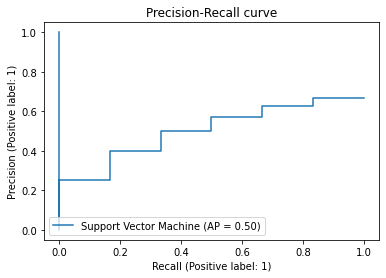

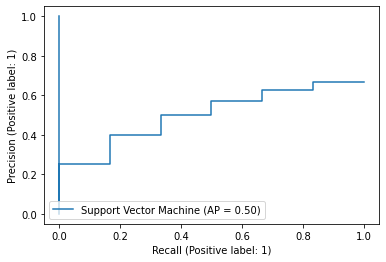

In [ ]:
print(confusion_matrix(y_test,predict))
print(classification_report(y_test,predict))
display = PrecisionRecallDisplay.from_estimator(classifier, X_test, y_test, name='Support Vector Machine')
_ = display.ax_.set_title("Precision-Recall curve")
display.plot()

# KNN

In [ ]:
def KfoldCrossValidation(model):
    pipeline = make_pipeline(model)
    strtfdKFold = StratifiedKFold(n_splits=10)
    kfold = strtfdKFold.split(X_train, y_train)
    scores = []
    for k, (train, test) in enumerate(kfold):
        pipeline.fit(X_train[train, :], y_train[train])
        score = pipeline.score(X_train[test, :], y_train[test])
        scores.append(score)
        
        print('Fold: %2d, Training/Test Split Distribution: %s, Accuracy: %.3f' % (k+1, np.bincount(y_train[train]), score))
    print('\nCross-Validation accuracy: %.3f +/- %.3f' %(np.mean(scores), np.std(scores)))

we've excuted KNN and found out the best best parameters. The parameters used for n estimators are 2,3,4,5,6,7,8,9,10. 

Among the above mentioned Parameters we've found out the best params and that is as follows:


1.   n_neighbors=4


In [ ]:
cls = KNeighborsClassifier(n_neighbors=4)

# params = {'n_neighbors':[2,3,4,5,6,7,8,9,10]}
# clf = GridSearchCV(cls, params)
# clf.fit(X_train,y_train)
# print("Best parameters for SVM: ",clf.best_params_)

In [ ]:
#cls.set_params(**clf.best_params_)

print("K-fold Cross Validation for 10 splits")
KfoldCrossValidation(cls) 

K-fold Cross Validation for 10 splits
Fold:  1, Training/Test Split Distribution: [15 21], Accuracy: 1.000
Fold:  2, Training/Test Split Distribution: [15 21], Accuracy: 0.500
Fold:  3, Training/Test Split Distribution: [15 21], Accuracy: 0.000
Fold:  4, Training/Test Split Distribution: [15 21], Accuracy: 0.000
Fold:  5, Training/Test Split Distribution: [14 22], Accuracy: 0.750
Fold:  6, Training/Test Split Distribution: [14 22], Accuracy: 0.250
Fold:  7, Training/Test Split Distribution: [14 22], Accuracy: 0.500
Fold:  8, Training/Test Split Distribution: [14 22], Accuracy: 0.250
Fold:  9, Training/Test Split Distribution: [14 22], Accuracy: 1.000
Fold: 10, Training/Test Split Distribution: [14 22], Accuracy: 0.250

Cross-Validation accuracy: 0.450 +/- 0.350


In [ ]:
cls.fit(X_train, y_train)
predict = cls.predict(X_test)

Confusion matrix and PR curves for SVM.

The accuracy for KNN is 30% and the best is around 50%.

[[1 3]
 [4 2]]
              precision    recall  f1-score   support

           0       0.20      0.25      0.22         4
           1       0.40      0.33      0.36         6

    accuracy                           0.30        10
   macro avg       0.30      0.29      0.29        10
weighted avg       0.32      0.30      0.31        10



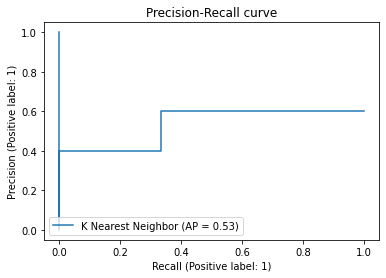

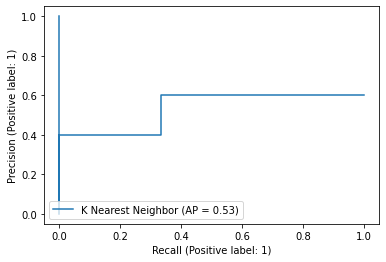

In [ ]:
print(confusion_matrix(y_test,predict))
print(classification_report(y_test,predict))
display = PrecisionRecallDisplay.from_estimator(cls, X_test, y_test, name='K Nearest Neighbor')
_ = display.ax_.set_title("Precision-Recall curve")
display.plot()

# CNN
We have then implemented a CNN model. The architecture consists of 3 layers. In each layer there is a 2d-convolution layer followed by a max-pooling layer. At the end we have used softmax-layer for classification. Adam Optimizer is used and for loss function binary_crossentropy is used. We’ve used Denser Layer 1 with 256 nodes and Denser Layer 2 with 2 nodes using the softmax classification layer. 

In [ ]:
classifier = Sequential()
classifier.add(Convolution2D(32, 3, 3, input_shape = (64, 64, 3), activation = 'relu'))
classifier.add(MaxPooling2D(pool_size = (2, 2)))
classifier.add(Convolution2D(32, 3, 3, activation = 'relu'))
classifier.add(MaxPooling2D(pool_size = (2, 2)))
classifier.add(Flatten())
classifier.add(Dense(units = 256, activation = 'relu')) # Adding the Hidden Layer 
classifier.add(Dense(units = 2, activation = 'softmax')) #Adding the output layer
print(classifier.summary())

classifier.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy'])

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 21, 21, 32)        896       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 10, 10, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 3, 3, 32)          9248      
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 1, 1, 32)         0         
 2D)                                                             
                                                                 
 flatten (Flatten)           (None, 32)                0         
                                                                 
 dense (Dense)               (None, 256)               8

The results are as follows loss: 0.4537 - accuracy: 0.6232. 

In [ ]:
classifier.fit_generator(dataGenerator(), verbose=True)

<ipython-input-18-5b7365432d21>:1: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  classifier.fit_generator(dataGenerator(), verbose=True)


247/247 [==============================] - 106s 424ms/step - loss: 0.4537 - accuracy: 0.6232


# MLP

We've excuted this MLP in another colab file and we got Best parameters for MLP:  {'activation': 'logistic', 'hidden_layer_sizes': (64, 32, 16, 8), 'learning_rate': 'constant', 'max_iter': 2000}

In [9]:
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import GridSearchCV

We've choosen best params and run that in other model. In activation parameters, we’ve used logistic, tanh and relu. For Learning rate we’ve used constant and adaptive.For hidden layer size, we’ve used the size of (64,32,16,8),(128,64,32,16,8) and (32,16,8). And lastly the maximum iterations we’ve used are 1000, 1500 and 2000. We’ve used Gridsearch as a classifier. Best parameters for MLP:  {'activation': 'logistic', 'hidden_layer_sizes': (64, 32, 16, 8), 'learning_rate': 'constant', 'max_iter': 2000}. 

In [10]:
cls = MLPClassifier(activation = 'logistic')

# params = {'activation': ['logistic'], 'learning_rate': ['constant'], 'hidden_layer_sizes':[(64,32,16,8)], 'max_iter':[2000]}
# clf = GridSearchCV(cls, params)
# clf.fit(X_train,y_train)
# print("Best parameters for MLP: ",clf.best_params_)

In [ ]:
# cls.set_params(**clf.best_params_)

cls.fit(X_train, y_train)
predict = cls.predict(X_test)

In [ ]:
print(confusion_matrix(y_test,predict))
print(classification_report(y_test,predict))
display = PrecisionRecallDisplay.from_estimator(cls, X_test, y_test, name='Multi Layer Perceptron')
_ = display.ax_.set_title("Precision-Recall curve")
display.plot()

In [ ]:
!pip install scipy==1.1.0

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 15.6 MB 3.8 MB/s 
  Created wheel for scipy: filename=scipy-1.1.0-cp38-cp38-linux_x86_64.whl size=41835135 sha256=9dc9d82894b1328b5296bf4416678543321fea4bf09dba0a408b0621e1820b70
  Stored in directory: /root/.cache/pip/wheels/29/a9/5e/9e4eddde37a1e15cf5cb404ba197df482cc39ffbfef91ec337
Successfully built scipy
  Attempting uninstall: scipy
    Found existing installation: scipy 1.7.3
    Uninstalling scipy-1.7.3:
      Successfully uninstalled scipy-1.7.3
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
pymc 4.1.4 requires scipy>=1.4.1, but you have scipy 1.1.0 which is incompatible.
plotnine 0.8.0 requires scipy>=1.5.0, but you have scipy 1.1.0 which is incompatible.
jaxlib 0.3.25+cuda11.cudnn805 requires scipy>=1.5, but you 

# Blob Detection

Importing the requirements for Blob Detection


In [ ]:
from skimage import io
from skimage import color
from skimage import transform
from scipy.ndimage.filters import gaussian_laplace, convolve
from scipy.ndimage.filters import rank_filter, generic_filter
from scipy.misc import imresize
import time
import math
from itertools import chain

Loading and processing for Image

In [ ]:
#Loading and processing for Image
def Img_load_preprocess(path):
    # For Loading image.
    images = io.imread(path)
    #For Gray and scale image.
    images = color.rgb2gray(images)
    # images /= 255
    return images

Upload the respective pic 

In [ ]:
#Upload your respective pic 
from google.colab import files

#Uploading for X-ray Image
uploaded = files.upload()

Saving JPCLN001.png to JPCLN001 (2).png


Getting the squared Laplacian response in scale-space, and used two methods: 


1.   Increase filter size method
2.   Downsample method




In [ ]:
import matplotlib.pyplot as plt

#Getting the squared Laplacian response in scale-space.
def for_scale_space(image, init_sigma, levels, k, method):
    sigma = np.zeros(levels)
    sigma[0] = init_sigma
    
    height = image.shape[0]
    width = image.shape[1]
    
    scale_space = np.empty((height, width, levels))
    
# Method 1 - Increase filter size method
    def increase_filter_size():
        for i in range(levels):

            # Ensuring odd filter size.
            filter_size = int(round(6 * sigma[i]))
            if filter_size % 2 == 0:
                filter_size += 1

            # Initializing filter matrix and index of center entry
            center = int((filter_size + 1)/2 - 1)  
            gauss_filter = np.zeros((filter_size, filter_size))
            gauss_filter[center][center] = 1

            # Obtaining filter with normalization and apply convolution.
            LoG = sigma[i]*sigma[i]*gaussian_laplace(gauss_filter, sigma[i])
            plt.imshow(LoG)
            plt.title("Increase Filter LoG for sigma {}".format(sigma[i]))
            plt.show()
            scale_space[:,:,i] = convolve(image, LoG) ** 2

            # Updating sigma.
            if (i+1 < levels):
                sigma[i+1] = sigma[i] * k
    
# Method 2 - Downsample method
    def downsample():
        # Ensuring odd filter size.
        filter_size = int(round(6 * sigma[0]))
        if filter_size % 2 == 0:
            filter_size += 1
        
        # Initializing filter matrix.
        center = int((filter_size + 1)/2 - 1)  # index of center entry
        gauss_filter = np.zeros((filter_size, filter_size))
        gauss_filter[center][center] = 1
        
        # Obtaining filter (no normalization needed).
        LoG = gaussian_laplace(gauss_filter, sigma[0])
        plt.imshow(LoG)
        plt.title("Downsample  LoG")
        plt.show()
        
        # Scaling the image.
        for i in range(levels):
            # Down scale.
            scaled_h = int(height * ((1/k) ** i))
            scaled_w = int(width * ((1/k) ** i))
            scaled_im = transform.rescale(image, (1/k) ** i, order=3)
            
            # Applying convolution without normalization.
            im_tmp = convolve(scaled_im, LoG) ** 2
            
            # Upscaling the image .
            scale_space[:,:,i] = transform.resize(im_tmp, (height, width), order=3)
            
            # Updating the sigma.
            if (i+1 < levels):
                sigma[i+1] = sigma[i] * k

    # Run method and record time.
    print('Calculating squared Laplacian response in scale-space...')
    
    start = time.time()
    run = {'increase_filter_size': increase_filter_size, 
           'downsample': downsample}
    run[method]()
    end = time.time()
    
    print('Method used: ' + method + 
          '; Time elapsed: {} s.'.format(end-start))

    return scale_space, sigma

Helper function for non-maximum suppression in each 2D slice.

In [ ]:
# Helper function: non-maximum suppression in each 2D slice.
def non_max_sup_2D(scale_space, method):
    height = scale_space.shape[0]
    width = scale_space.shape[1]
    levels = scale_space.shape[2]
    
    local_max = np.empty((height, width, levels))
    
    # Method 1: rank_filter.
    def rank():
        for i in range(levels):
            curr_response = scale_space[:,:,i]
            local_max[:,:,i] = rank_filter(curr_response, -1, (3,3))
    
    # Method 2: generic_filter.
    def generic():
        for i in range(levels):
            curr_response = scale_space[:,:,i]
            
            find_max = lambda arr:np.amax(arr)
            local_max[:,:,i] = generic_filter(curr_response, find_max, (3,3))
    
    # Run method and record time.
    print('Running local non-max suppression...')
    
    start = time.time()
    run = {'rank': rank, 'generic': generic}
    run[method]()
    end = time.time()
    
    print('Method used:' + method + 
          '; Time elapsed: {} s.'.format(end-start))
    
    return local_max

Helper function: compute radius of each local maximum.

In [ ]:
# Helper function: compute radius of each local maximum.
def get_radius(sigma, num_rads): 
    return np.ones(num_rads) * math.sqrt(2) * sigma

Helper function: mask filter to eliminate boundaries noises.

In [ ]:
# Helper function: mask filter to eliminate boundaries noises.
def get_mask(height, width, levels, sigma):
    mask = np.zeros((height, width, levels))
    for i in range(levels):
        b = int(math.ceil(sigma[i] * math.sqrt(2)))  # Boundary.
        mask[b+1:height-b, b+1:width-b] = 1
    return mask

Non-maximum suppression in 3D scale space.

In [ ]:
# Non-maximum suppression in 3D scale space.
def non_max_sup_3D(scale_space, sigma):
    
    # Obtaining local 2D non max sup using rank_filter.
    local_max = non_max_sup_2D(scale_space, 'rank')
    
    height = local_max.shape[0]
    width = local_max.shape[1]
    levels = local_max.shape[2]
    
    # Computuite non-max suppression accorss all layers.
    print("Running global non-max suppression...")
    global_max = np.zeros(local_max.shape)
    
    for i in range(height):
        for j in range(width):
            max_value = np.amax(local_max[i,j,:])
            max_idx = np.argmax(local_max[i,j,:])
            global_max[i,j,max_idx] = max_value
    
    # Eliminating duplicate values.
    for i in range(levels):
        global_max[:,:,i] = np.where((global_max[:,:,i] == 
                                      scale_space[:,:,i]), 
                                     global_max[:,:,i], 0)
        
    print("Done with global non-max suppression.")
    return global_max

Obtaining center points and radius of blobs.

In [ ]:
# Obtaining center points and radius of blobs.
def detect_blob(global_max, threshold, sigma):
    levels = global_max.shape[2]
    
    mask = get_mask(global_max.shape[0], 
                    global_max.shape[1], 
                    levels, sigma)
    
    row_idx = []
    col_idx = []
    radius = []
    
    print('Finding blobs...')
    for i in range(levels):
        global_max[:,:,i] = np.where((global_max[:,:,i] > threshold) & 
                                     (mask[:,:,i] == 1), 1, 0)
        
        # Obtaining row & column index for local maxima.
        row_idx.append(list(np.where(global_max[:,:,i] == 1)[0]))
        col_idx.append(list(np.where(global_max[:,:,i] == 1)[1]))
        
        # Compute radius.
        radius.append(list(get_radius(sigma[i], len(row_idx[i]))))
    
    # Flattenning nested list.
    row_idx = list(chain.from_iterable(row_idx))
    col_idx = list(chain.from_iterable(col_idx))
    radius = list(chain.from_iterable(radius))
    
    print('Done with finding blobs.')
    return row_idx, col_idx, radius

In [ ]:
#image: numpy array, representing the grayscsale image
def show_and_save_all_circles(image, cx, cy, rad, 
                              path, method, threshold, color='r'):

    import matplotlib.pyplot as plt
    from matplotlib.patches import Circle
    #cx, cy: numpy arrays or lists, centers of the detected blobs
    fig, ax = plt.subplots()
    ax.set_aspect('equal')
    ax.imshow(image, cmap='gray')

    #rad: numpy array or list, radius of the detected blobs
    for x, y, r in zip(cx, cy, rad):
        circ = Circle((x, y), r, color=color, fill=False)
        ax.add_patch(circ)

    plt.title('%i circles' % len(cx))
    plt.savefig(path+method+'_'+str(threshold)+'.svg', format='svg')
    plt.show()

Pipeline for running the whole program

In [ ]:
# Pipeline for running the whole program.
def run_detection(path, method, levels, k, threshold, init_sigma):
    # Loading and preprocessing the image. 
    images = Img_load_preprocess(path)
    
    # Getting the responces.
    scale_space, sigma = for_scale_space(images, init_sigma, levels, k, method)
    
    # For Non-max suppression.
    global_max = non_max_sup_3D(scale_space, sigma)
    print(global_max)
    
    # Getting the blobs.
    row_idx, col_idx, radius = detect_blob(global_max, threshold, sigma)
    print(detect_blob(global_max, threshold, sigma))
    
    # Displaying and saving the output.
    show_and_save_all_circles(images, col_idx, row_idx, radius, 
                              path, method, threshold)

In [ ]:
import numpy as np

In [ ]:
# Choosing one image among below mentioned ones.
path =  ['JPCLN001.png']

# Choose one method.
methods = ['increase_filter_size', 'downsample']

# Configure parameters.
levels = 10  # Scale levels
k = 1.25  # Scale factor
init_sigma = 2 

# Good thresholds for method 0 and 1.
thresholds = np.array([0.0000001, 0.000000008])

Method used: increase_filter_size
Calculating squared Laplacian response in scale-space...


<ipython-input-2-a687a0aebebd>:6: FutureWarning: The behavior of rgb2gray will change in scikit-image 0.19. Currently, rgb2gray allows 2D grayscale image to be passed as inputs and leaves them unmodified as outputs. Starting from version 0.19, 2D arrays will be treated as 1D images with 3 channels.
  images = color.rgb2gray(images)


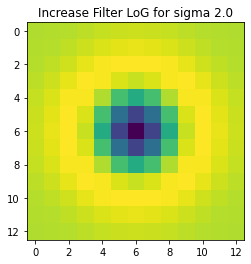

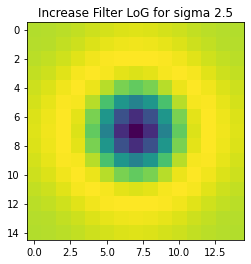

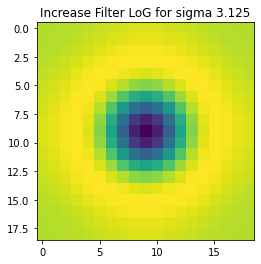

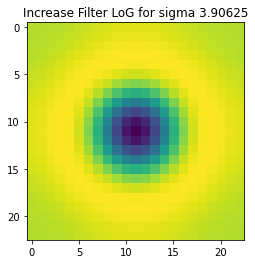

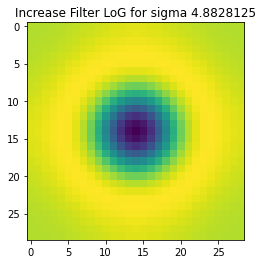

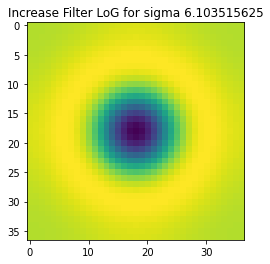

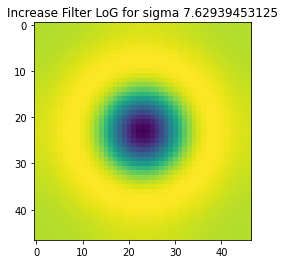

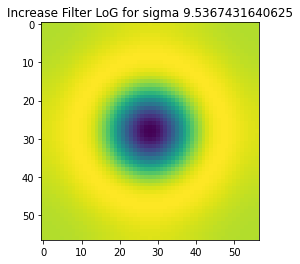

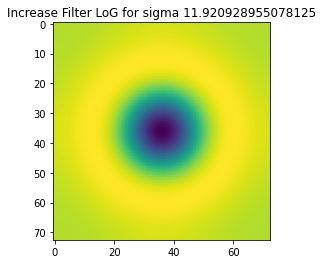

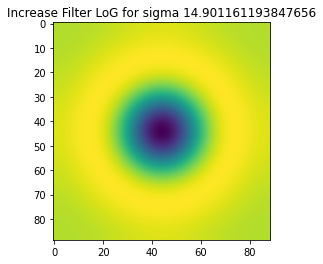

Method used: increase_filter_size; Time elapsed: 119.3772451877594 s.
Running local non-max suppression...
Method used:rank; Time elapsed: 1.9984850883483887 s.
Running global non-max suppression...
Done with global non-max suppression.
[[[  0.   0.   0. ...   0.   0.   0.]
  [  0.   0.   0. ...   0.   0.   0.]
  [  0.   0.   0. ...   0.   0.   0.]
  ...
  [  0.   0.   0. ...   0.   0. 100.]
  [  0.   0.   0. ...   0.   0. 100.]
  [  0.   0.   0. ...   0.   0. 100.]]

 [[  0.   0.   0. ...   0.   0.   0.]
  [  0.   0.   0. ...   0.   0.   0.]
  [  0.   0.   0. ...   0.   0.   0.]
  ...
  [  0.   0.   0. ...   0.   0.   0.]
  [  0.   0.   0. ...   0.   0.   0.]
  [  0.   0.   0. ...   0.   0.   0.]]

 [[  0.   0.   0. ...   0.   0.   0.]
  [  0.   0.   0. ...   0.   0.   0.]
  [  0.   0.   0. ...   0.   0.   0.]
  ...
  [  0.   0.   0. ...   0.   0.  81.]
  [  0.   0.   0. ...   0.   0.  81.]
  [  0.   0.   0. ...   0.   0.  81.]]

 ...

 [[  0.   0.   0. ...   0.   0.   0.]
  [  0.   0

IOPub data rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_data_rate_limit`.

Current values:
NotebookApp.iopub_data_rate_limit=1000000.0 (bytes/sec)
NotebookApp.rate_limit_window=3.0 (secs)



In [ ]:
print("Method used: increase_filter_size")
run_detection(path[0], methods[0], levels, k, thresholds[0], init_sigma)

print(" ")
print("Method used: downsample")
run_detection(path[0], methods[1], levels, k, thresholds[1], init_sigma)

In [ ]:
metadata = pd.read_csv("./nodules-in-chest-xrays-jsrt/jsrt_metadata.csv")
metadata.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 247 entries, 0 to 246
Data columns (total 10 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   study_id   247 non-null    object 
 1   subtlety   154 non-null    float64
 2   size       154 non-null    float64
 3   age        247 non-null    object 
 4   gender     247 non-null    object 
 5   x          154 non-null    float64
 6   y          154 non-null    float64
 7   state      247 non-null    object 
 8   position   154 non-null    object 
 9   diagnosis  154 non-null    object 
dtypes: float64(4), object(6)
memory usage: 19.4+ KB


In [ ]:
metadata = pd.DataFrame(metadata, columns=['study_id', 'x', 'y', 'position', 'diagnosis'])
metadata.head()

,study_id,x,y,position,diagnosis
0,JPCLN001.png,1634.0,692.0,l.upper lobe,lung cancer
1,JPCLN002.png,1614.0,1090.0,l.upper lobe(S5),pulmonary hematoma
2,JPCLN003.png,1303.0,447.0,l.upper lobe(S1+2),lung cancer
3,JPCLN004.png,606.0,836.0,r.upper lobe,Inflammatory mass
4,JPCLN005.png,1438.0,692.0,l.upper lobe(S3),lung cancer


In [ ]:
from google.colab import files
uploaded = files.upload()

Saving JPCLN008.png to JPCLN008 (1).png


# Final Output


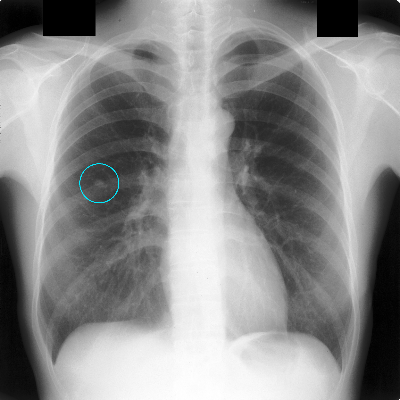

Uploaded X-RAY scan is Abnormal at position r.lower lobe diagnosis granuloma


In [ ]:
for image in uploaded.keys():
  value = metadata.loc[metadata['study_id'] == image]
  info = list(value['position'])[0]+" diagnosis "+list(value['diagnosis'])[0]
  if image.startswith('JPCLN'): msg = msg = 'Uploaded X-RAY scan is Abnormal at position {}'.format(info)
  else: msg = 'Uploaded X-RAY scan is Normal at position {}'.format('')
  img = cv2.imread(image)
  point = (int(value['x']), int(value['y']))
  img = cv2.circle(img, point, 100, color = (255,234,0), thickness=4)
  img = cv2.resize(img, (400,400))
  cv2_imshow(img)
  print(msg)